<a href="https://colab.research.google.com/github/Thuoq/Practical-Machine-Learning-for-Computer-Vision/blob/main/Image_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Vision 
Trong Chương 2, chúng ta đã xem xét các mô hình học máy coi pixel là đầu vào độc lập. Các lớp mạng nơ-ron được kết nối đầy đủ truyền thống hoạt động kém trên hình ảnh bởi vì chúng không tận dụng được thực tế là các pixel lân cận có tương quan cao (xem Hình 3-1). Hơn nữa, việc kết nối đầy đủ nhiều lớp không tạo ra bất kỳ điều khoản đặc biệt nào đối với bản chất phân cấp 2D của hình ảnh. Các điểm ảnh gần nhau phối hợp với nhau để tạo ra các hình dạng (chẳng hạn như đường thẳng và vòng cung) và bản thân các hình dạng này kết hợp với nhau để tạo ra các phần dễ nhận biết của một đối tượng (chẳng hạn như thân và cánh hoa). Trong chương này, chúng ta sẽ khắc phục điều này bằng cách xem xét các kỹ thuật và kiến trúc mô hình tận dụng các tính chất đặc biệt của hình ảnh.

## Pretrained Embeddings 
The mạng nơ ron sâu rằng chúng ta đã phát triển trong chươg trước chúng ta có 2 hiddens layers, một với 64 nodess và 1 cái là 16 nodes. 1 cách để nghĩ về cái thiết kết của lưới này như hình dưới. Một khía cạnh nào đó, tất cả thông in bao gồm trong input image được đại diện bởi các lớp trên cùng, tất cả output bao gồm 16 nodess, 16 nodess này cung cấp như 1 đại diện của hình ảnh đc code là **embedding**. 

### Pretrained Model. 

Việc **embedding** là được tạo bởi 1 tập hợp các toán đến với input image. Sẽ ra sao nếu chúng ta sử dụng lại 1 phần tử model đã huấn luyện tren 1 tập dữ liệu lớn hơn ?. Chúng tôi không thể sử dụng lại toàn bộ mô hình vì mô hình đó sẽ không được đào tạo để phân loại hoa. Tuy nhiên chúng ta có thể ném lastlayerss, của model và thay thế chúng bằng our own. Phần cài đặt lại của mô hình đãi được huấn luyện từ trước trên 1 large dataset

### Fine-Tunning 
Xuyên suốt transfer learning , chúng ta đã lấy tất cả MibleNet và sử dunghj chúng ta đã làm 1 layers- nontrainable. Chỉ sử dụng 2 dense cuối và chỉnh nó thành 5-flowser.

Trong rất nhiều trường hợp, chúng ta có thể lấy được kết quả tốt hơn nếu chúng ta cho phép khi các vòng huấn luyện cũng có thể điều chỉnh các lớp đào tạo trước. Kỹ thuật này được  gọi là *fine_tunning*. Pretranined weight đã sử dụng được gọi như là init-values cho weight của mỗi mạng nurowns. 

Về lý thuyết, tất cả những gì cần thiết để chuyển từ học chuyển sang tinh chỉnh là chuyển `trainable = True || False` thành  `True`khi tải một mô hình được đào tạo trước và đào tạo trên dữ liệu của bạn. Tuy nhiên, trong thực tế, bạn thường sẽ nhận thấy các đường cong luyện tập giống như đường cong như hình dưới

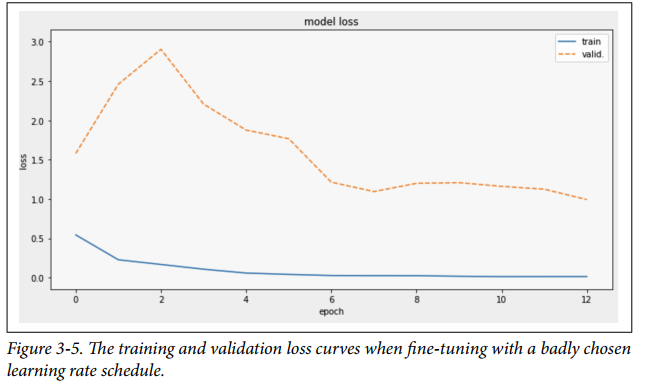

Từ biểu đồ trên cho ta thấy rằng model của chúng ta sẽ hội tụ  về mặt toán hoặc. Nhưng hiệu xuất trên tập validation data là rất xấu và nó sẽ rất mất time để hồi phụ lại. Với 1 *learning-rate* set quá cả, pretrained weight nó sẽ thay đổi các bước lỗi. Và để tìm được *learning-rate* thường là khó nhất, vì quá cao thì quá thấp. quá thấp thì lâu, còn quá cao thì các huấn luyện trước sẽ mất. 

Có 2 kỹ thuật để xử lý cái vấn đề trên này:
1. **learning-schedule**
2. **layers-wise learning rate**


#### Learning rate schedule 
Hầu như learning rate khi huấn luyện neurosn netwwork có learning rate bắt đầu cao và giảm dần theo cấp số nhân.  như hình dưới


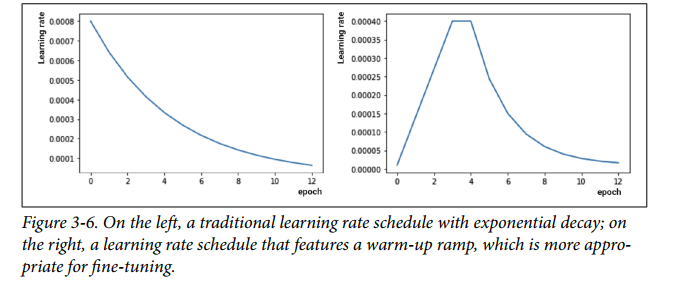

## Convolutional Networks
1 Layers tích chập được thiết kế riêng biệt cho hình ảnh. Chúng hoạt động trên 2 chiều và có thể capture thông tin, chúng làm việt bởi **sliding a small windows** được gọi là *convolutional layers* theo cả 2 chiều

### Convolutional Filters 
1 loại 4x4 filter sẽ có filter độc lập weights cho mỗi chanels của hình ảnh. Ví dụ color của hình ảnh với red, green, và blues thì filter sẽ có 4*4*3 = 48 weight intotal. Và cái filter sẽ áp dụng cho 1 điểm trong hình ảnh bởi nhân với các giá trị pixel ở ngay cạnh. và nhân chúng đó và tích hợp lại thành 1 cái pixel duy nhất thì được gọi là **convolution** như hình dưới

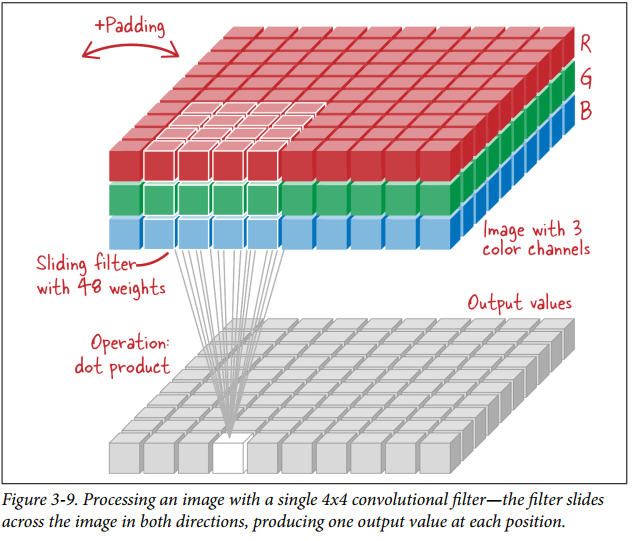

Một bộ lọc chập đơn có thể xử lý toàn bộ hình ảnh với rất ít tham số có thể học được, trên thực tế rất ít, đến mức nó sẽ không thể học và thể hiện đủ độ phức tạp của hình ảnh. Nhiều bộ lọc như vậy là cần thiết. Một lớp tích chập thường chứa hàng chục hoặc hàng trăm bộ lọc tương tự, mỗi bộ lọc có trọng số độc lập có thể học được (xem Hình 3 11). Chúng được áp dụng liên tiếp vào hình ảnh và mỗi thứ tạo ra một kênh giá trị đầu ra. Đầu ra của một lớp chập là một tập đa kênh các giá trị 2D. Lưu ý rằng, output phải chùng với số của chiều input hình ảnh. vốn đã có 3 three-chanel set của 2D-paxel

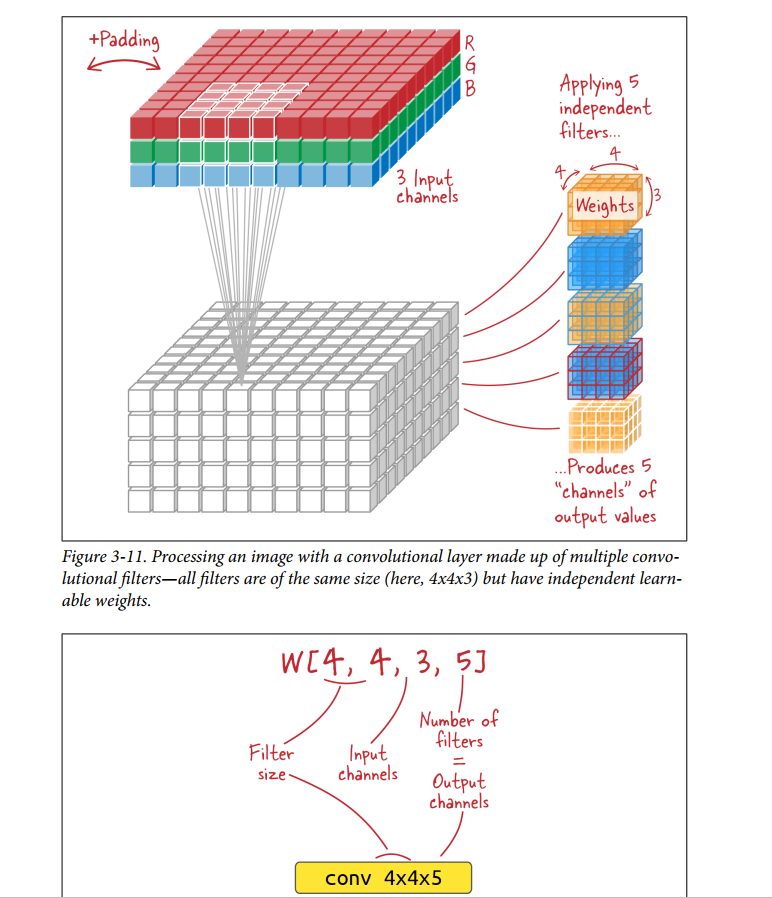

Trong trường hợp trên, với 5 fiters đc sử dụng tổng số weight mà phải học trong tích chập là 240
và nó sử dụng trong keras như code ở dưới đây 

In [1]:
#import library
from tensorflow import keras 

In [2]:
keras.layers.Conv2D(5,kernel_size=(4,4),strides=(1,1),
                    padding='valid',
                    activation=None)

Để giải thích code ở trên 

- **filter**: ở đây là 5 là số lượng filters độc lập apply input 
- **kernel_size**: đây là size của mỗi filters. Đây có thể là 1 signle number, như 4 => (4,4) hoặc 1 pair như (4,2
- **strides**: 1 filter cắt qua từng chiều trong các buớc


còn với code ở hình trên  sẽ là 

In [3]:
keras.layers.Conv2D(filters=5,kernel_size=4,padding='same')

### Stacking Convolutional Layers 

### Pooling Layers 

Số lượng bộ lọc được áp dụng trong mỗi lớp chập xác định số chanels trong đầu ra. Nhưng làm thế nào chúng ta có thể kiểm soát được số lượng dữ liệu trong chanel?. Mục tiêu của a mạng neurons là luông luôn chắt lọc thông tin từ input image bảo gồm hằng triệu pixel thành 1 số ít các lớp. Vì vậy, chúng ta sẽ cần 1 layer có thể combine hoặc lấy thôn tin từ mỗi chanel 

Cái kỹ thuật downsampling thường được sử dụng nhất là 2x2 **max pooling**. Với max pooling, chỉ duy nhất giá trị maximiun là được giữa lại cho mỗi nhóm của 4 input giá trị đầu vào từ 1 chanel. **Average pooling** làm việc giống như cách này, nó sẽ trung bình 4 giá trịnh thay vì giữa max như hình dưới

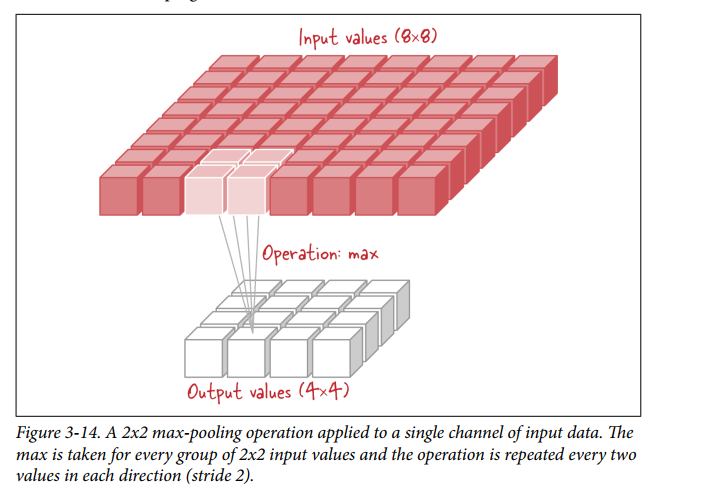

Pooling Layers và Convolutional cũng có những ảnh hưởng khác nhau đến vị trí của các đối tượng được phát hiện. Một lớp phức hợp trả về một bản đồ đối tượng địa lý với các giá trị cao của nó nằm ở nơi các bộ lọc của nó phát hiện ra điều gì đó quan trọng. Mặt khác, gộp các lớp lại làm giảm độ phân giải của bản đồ đối tượng địa lý và làm cho thông tin vị trí kém chính xác hơn.

Có 1 cách khác để downsample là sử dụng stride từ 1 thành 2. 

### AlexNet 

Kiến trúc mạng neurons tích chập đơn giản nấht là mix của **convvolutional** layes và **max-pooling** layers. Nó biến đổi mỗi input image vào trong 1 hình chữ nhật cuối cùng của các giá trị được gọi là **features map**,sau đó được đưa vào một số lớp được kết nối đầy đủ và cuối cùng là lớp softmax để tính toán xác suất của lớp.

Dưới đây là mô hình kiến trúc của Alex Net


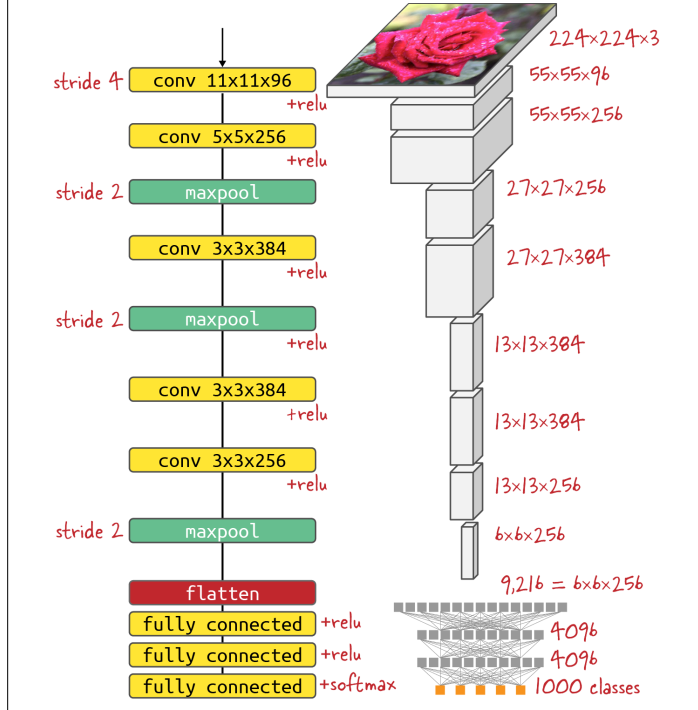

## The Quest for Depth 

Sau AlexNet, các nhà nghiên cứu bắt đầu tăng chiều sâu của CN work. Và họ đã nhận ra rằng là nến thêm nhiều layers thì kết quả sẽ tốt hơn cho classification accucacy 1. Dứoi đây là 1 vài điều giải thích cho điều trên:


**Sự rõ ràng về argument**

Một lớp đơn là một hàm tuyến tính. Nó không thể tính gần đúng các hàm phi tuyến phức tạp, bất kể số lượng tham số của nó. Tuy nhiên, mỗi lớp được kích hoạt bằng một chức năng kích hoạt phi tuyến như sigmoid hoặc ReLU. Việc xếp chồng nhiều lớp dẫn đến nhiều điểm phi tuyến tính liên tiếp và cơ hội tốt hơn để có thể ước tính gần đúng chức năng phức tạp mong muốn, chẳng hạn như phân biệt giữa hình ảnh của mèo và chó.


**Lập luận tổng quát hóa**

Việc thêm các tham số vào một lớp sẽ làm tăng “bộ nhớ” của mạng nơ-ron và cho phép nó học những thứ phức tạp hơn. Tuy nhiên, nó sẽ có xu hướng học chúng bằng cách ghi nhớ các ví dụ đầu vào. Điều này không khái quát tốt. Mặt khác, việc xếp chồng nhiều lớp buộc mạng phải chia nhỏ đầu vào về mặt ngữ nghĩa thành cấu trúc phân cấp các tính năng. Ví dụ, các lớp ban đầu sẽ nhận ra lông và râu, và các lớp sau đó sẽ lắp ráp chúng để nhận ra đầu mèo, sau đó là toàn bộ con mèo. Bộ phân loại kết quả tổng quát tốt hơn


**Đối số trường cảm nhận**


Nếu đầu của con mèo che một phần đáng kể của hình ảnh — ví dụ, vùng 128x128 pixel — thì một mạng phức hợp lớp đơn sẽ cần bộ lọc 128x128 để có thể chụp được nó, điều này sẽ rất tốn kém về trọng lượng có thể học được. Mặt khác, các lớp xếp chồng có thể sử dụng các bộ lọc nhỏ 3x3 hoặc 5x5 và vẫn có thể “nhìn thấy” bất kỳ vùng 128x128 pixel nào nếu chúng đủ sâu trong ngăn xếp .convolutions.

Để thiết kế các mạng tích chập sâu hơn mà không làm tăng số lượng tham số một cách không kiểm soát, các nhà nghiên cứu cũng bắt đầu thiết kế các lớp tích chập rẻ hơn.
Hãy xem làm thế nào.

### Filter Factorization (Lọc thừa số)
Cái nào tốt hơn: bộ lọc chập 5x5 hoặc hai bộ lọc 3x3 được áp dụng theo trình tự? Cả hai đều có diện tích tiếp nhận là 5x5 (xem Hình 3-18). Mặc dù chúng không thực hiện cùng một phép toán, nhưng hiệu quả của chúng có thể là tương tự. Sự khác biệt là hai bộ lọc 3x3 được áp dụng theo thứ tự có tổng cộng 2 * 3 * 3 = 18 tham số có thể học được, trong khi một bộ lọc 5x5 duy nhất có 5 * 5 = 25 trọng số có thể học được. Vì vậy, hai bộ lọc 3x3 rẻ hơn. 

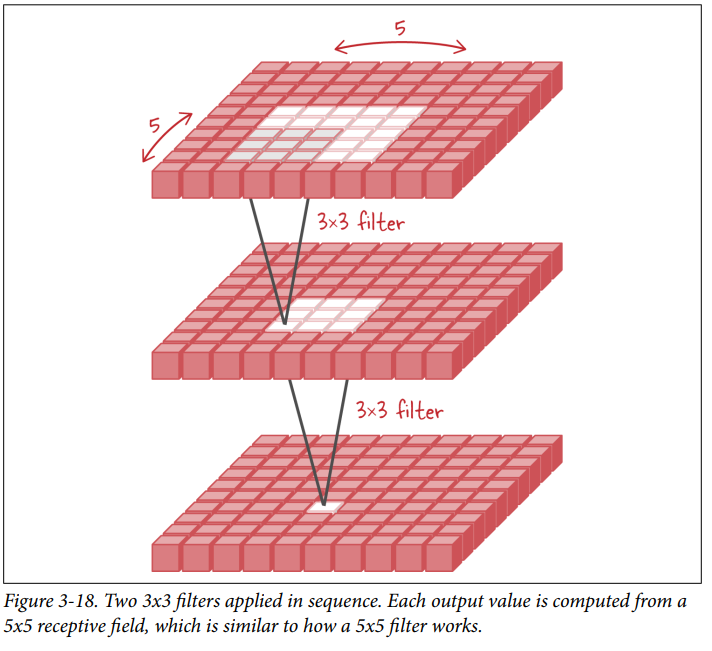

Kích thước bộ lọc khác phổ biến hiện nay là chập 1x1. Hãy xem tại sao ngta lại làm thế

### 1x1 Convolutions 

Trượt bộ lọc một pixel trên một hình ảnh nghe có vẻ ngớ ngẩn. Nó nhân hình ảnh với một hằng số. Tuy nhiên, trên các đầu vào đa kênh, với trọng số khác nhau cho mỗi kênh, điều đó thực sự có ý nghĩa. Ví dụ: nhân ba kênh màu của hình ảnh RGB với ba trọng số có thể học được và sau đó cộng chúng lên sẽ tạo ra sự kết hợp tuyến tính của các kênh màu thực sự có thể hữu ích. Lớp tích chập 1x1 thực hiện nhiều kết hợp tuyến tính kiểu này, mỗi lần với một bộ trọng số độc lập, tạo ra nhiều kênh đầu ra

Lớp tích chập 1x1 là một công cụ hữu ích để điều chỉnh số lượng kênh của dữ liệu. Ưu điểm thứ hai là các lớp chập 1x1 rẻ, về số lượng tham số có thể học được, so với các lớp 2x2, 3x3 hoặc lớn hơn.

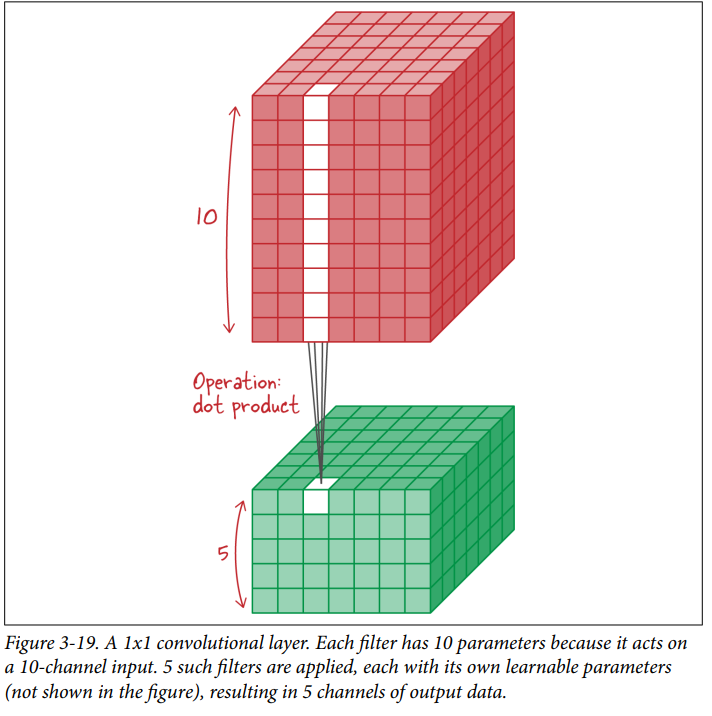

### VGG19
VGG19, được giới thiệu trong một bài báo năm 2014 bởi Karen Simonyan và Andrew Zisserman, là một trong những kiến trúc đầu tiên sử dụng độc quyền tích tụ 3x3. Hình 3-21 cho thấy nó trông như thế nào với 19 lớp.
Tất cả các lớp mạng nơron trong hình này đều sử dụng bias và được kích hoạt ReLU, ngoại trừ lớp cuối cùng sử dụng kích hoạt softmax.

VGG19 cải thiện trên AlexNet bằng cách sâu hơn nhiều. Nó có 16 lớp chập thay vì 5. Nó cũng sử dụng riêng lớp chập 3x3 mà không làm mất độ chính xác. Tuy nhiên, nó sử dụng đầu phân loại chính xác giống như AlexNet, với ba lớp lớn được kết nối đầy đủ chiếm hơn 120 triệu trọng lượng, trong khi nó chỉ có 20 triệu trọng lượng trong các lớp phức hợp. Có những lựa chọn thay thế rẻ hơn.

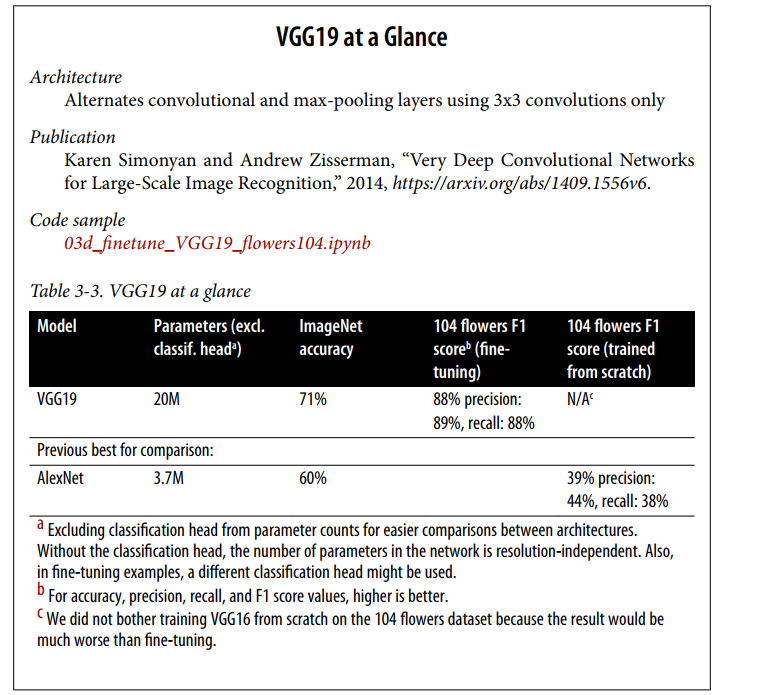

### Global Average Pooling 

## Modular Architectures 

1 sự liên tiếp của  tích hợp và pooling layers cũng đủ để xây dưng 1 basic mạng nơ ron Convolutional. Tuy nhiên, để tăng các dự đoán, các nhà nghiên cứuu đã xây dưng nhiều khối phức tạp hơn, hoặc là modules,thường được đặt tên như là **Inception modules**, **Residual Blocks** hoặc **Inverted residual bottlenecks**sau đó lắp ráp chúng thành các kiến trúc phức hợp hoàn chỉnh.Việc có các khối xây dựng cấp cao hơn cũng giúp dễ dàng tạo các thuật toán tự động để tìm kiếm các kiến trúc tốt hơn, như chúng ta sẽ thấy trong phần tìm kiếm kiến trúc thần kinh. Trong phần này, chúng ta sẽ khám phá một số kiến trúc mô-đun này và nghiên cứu đằng sau mỗi kiến trúc đó.

### Inception 